In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from typing import List, Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import ConfusionMatrixDisplay
card_df = pd.read_csv('Credit_card.csv')
label_df = pd.read_csv('Credit_card_label.csv')

This is the cleaning from Week 6, I simply merged the two datasets together to make it easier for machine learning

In [87]:
credit_df = pd.merge(card_df,label_df)


This is the new preprocessing 

In [88]:
credit_df = pd.get_dummies(credit_df)
#This changes categorical to numerical- from 0-1. This makes it easier for the machine to read


In [89]:
credit_df.fillna(credit_df.mean(), inplace=True)
#This removed all the NaN that may be present in the data, allowing for the machine to read it better

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ncredit_df = scaler.fit_transform(credit_df)
#This normalized the data so that there are less instances of error


In [91]:
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.00000,-18772.000000,365243,1,0,0,0,2,...,False,False,False,False,False,False,False,False,False,False
1,5009744,0,315000.00000,-13557.000000,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
2,5009746,0,315000.00000,-16040.342071,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
3,5009749,0,191399.32623,-13557.000000,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
4,5009752,0,315000.00000,-13557.000000,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,191399.32623,-11957.000000,-2182,1,0,0,0,2,...,False,False,True,False,False,False,False,False,False,False
1544,5023655,0,225000.00000,-10229.000000,-1209,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1545,5115992,2,180000.00000,-13174.000000,-2477,1,0,0,0,4,...,False,False,True,False,False,False,False,False,False,False
1546,5118219,0,270000.00000,-15292.000000,-645,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False


(8 pts) Perform combined, oversampling, or undersampling on the dataset you selected for Assignment 6.  Explain why you chose what you did. How did this impact the results of your KNN and Logistic Regression? 

In [92]:
X = credit_df.drop('label', axis =1)
y =credit_df['label']


X_train, X_test, y_train, y_test =  train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state =32,
                                                     stratify = y)


In [93]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


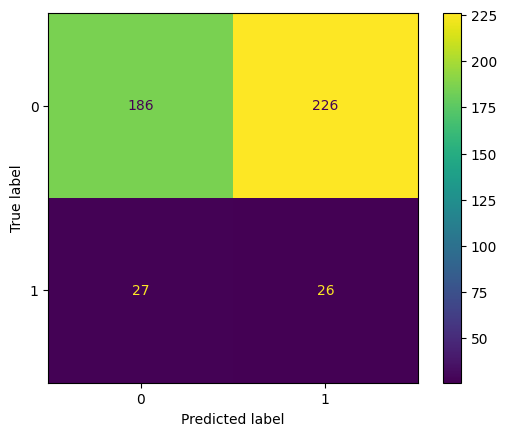

In [94]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

 Create an ROC Curve for the model and calculate the AUC